In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt
import numpy as np


1/1 [==============================] - 0s 43ms/step


2023-02-22 14:15:49.845857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


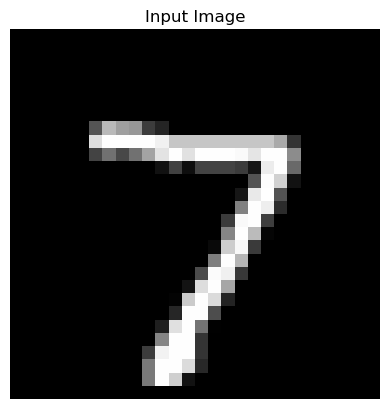

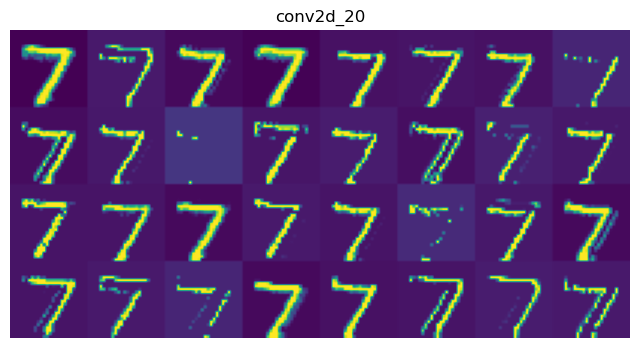

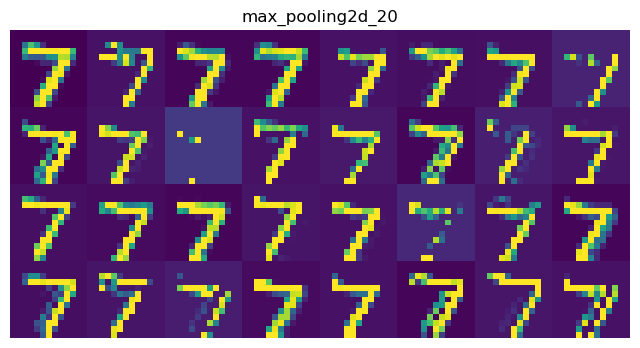

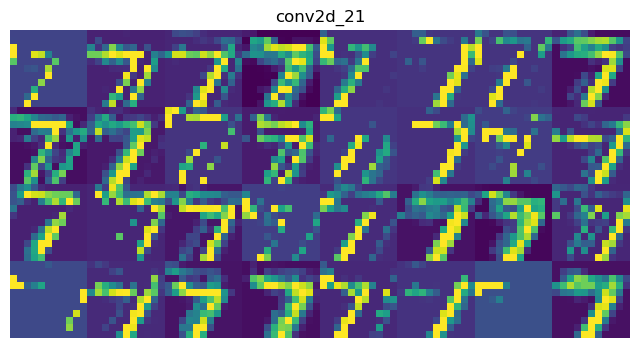

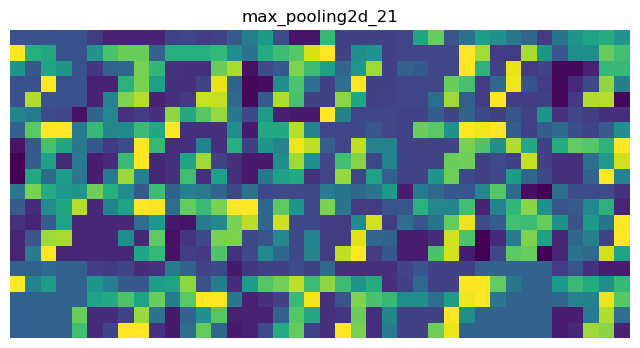

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [14]:
import matplotlib.pyplot as plt

# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Get the layer outputs and names
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Choose an input image from the test set to visualize
img_idx = 0
img = test_images[img_idx]

# Get the activations for each layer for the chosen input image
activations = activation_model.predict(np.expand_dims(img, axis=0))
layer_names = [layer.name for layer in model.layers]

# Display the input image
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

# Display the layer activations as graphs
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # Number of features in the feature map
    size = layer_activation.shape[1]  # The feature map has shape (1, size, size, n_features).
    n_cols = n_features // 8  # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, 8 * size))
    for col in range(n_cols):  # Tiles each filter into a big horizontal grid
        for row in range(8):
            channel_idx = col * 8 + row
            if channel_idx < n_features:
                channel_image = layer_activation[0, :,:, channel_idx]
                channel_image -= channel_image.mean()  # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    plt.show()


In [3]:
total_time = end_time - start_time
print(f'Total time elapsed during training: {total_time:.2f} seconds')
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Total time elapsed during training: 138.10 seconds
313/313 [==============================] - 4s 11ms/step - loss: 0.2456 - accuracy: 0.9297
Test accuracy: 0.9297000169754028
Test loss: 0.24560381472110748
